# <font style="font-family:roboto;color:#455e6c"> Setting up calculations for the phase diagram </font>  

<div class="admonition note" name="html-admonition" style="background:#e3f2fd; padding: 10px">
<font style="font-family:roboto;color:#455e6c"> <b> These notebooks are part of: </b> <a href="http://arxiv.org/abs/2403.05724"> Menon, S. et al. From electrons to phase diagrams with classical and machine learning potentials: automated workflows for materials science with pyiron. Preprint at http://arxiv.org/abs/2403.05724 (2024) </a> </font> </br>
</div>

In this notebook, sample calculations to arrive at the phase diagram are illustrated. Note that only examples are shown here, not the full set. However, the complete set of calculations, along with inputs and outputs for each potential are available in other notebooks in this folder.

## <font style="font-family:roboto;color:#455e6c"> How to calculate phase diagrams? </font> 

In order to arrive at the phase diagram, we calculate the free energy as function of temperature and composition. For each composition chosen, free energy calculations are carried out over the given temperature range using Calphy.

We start with imports

In [1]:
from pyiron_atomistics import Project
import matplotlib.pyplot as plt
import numpy as np

/home/menon/miniconda3/envs/potentials_v0.0.2/lib/python3.11/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
2024-04-08 15:20:31,269 - pyiron_log - WARNING - pyiron found a 'templates' folder in the /home/menon/pyiron/resources resource directory. These are no longer supported in pyiron_base >=0.7.0. They are replaced by Project.create_job_class() and Project.wrap_python_function().


We create a project

In [2]:
pr = Project('thermodynamics')

Here, we will calculated the free energy for pure Al, and for Al with 5% Li as examples. These calculations need to be repeated for the whole composition range.

First we calculate the free energy of fcc structure.

In [3]:
al_sol = pr.create.job.Calphy("Al_fcc", 
                              delete_aborted_job=True, 
                              delete_existing_job=True)

We create a fcc structure:

In [4]:
structure = pr.create.structure.ase.bulk('Al', cubic=True).repeat(4)

In [5]:
al_sol.structure = structure

Assign the potential

In [6]:
al_sol.potential = 'AlLi-EAM'

Use more than one core for the calculation

In [7]:
al_sol.server.cores = 4

We also change the equilibriation barostat to speed up the step

In [8]:
al_sol.input.equilibration_control = 'berendsen'

Now we can can the `calc_free_energy` method. ince we provide `600-1000`, the free energy is calculated at this temperature range. `pressure` denotes the pressure of the calculation, we chose 0 in this case. Since we are using a solid FCC lattice, we set `reference_phase` to `"solid"`. This means that the Einstein crystal will be used as the reference system. Finally, we have `n_equilibration_steps` and `n_switching_steps`. `n_equilibration_steps` denotes the number of MD steps over which the system is equilibrated to the required temperature and pressure. `n_switching_steps` are the number of MD steps over which the system is continuously transformed between the given interatomic potential, and the reference Einstein crystal.

In [9]:
al_sol.calc_free_energy(temperature=[600, 1000], 
                     pressure=0, 
                     reference_phase="solid",
                     n_equilibration_steps=5000,
                     n_switching_steps=5000)

and run the calculation

In [10]:
al_sol.run()

The job Al_fcc was saved and received the ID: 8135


/home/menon/miniconda3/envs/potentials_v0.0.2/lib/python3.11/site-packages/ase/io/lammpsdata.py:49: FutureWarning: "style" is deprecated; please use "atom_style".
  warnings.warn(
--------------------------------------------------------------------------
btl_vader_single_copy_mechanism MCA variable, but CMA support is
not available due to restrictive ptrace settings.

The vader shared memory BTL will fall back on another single-copy
mechanism if one is available. This may result in lower performance.

  Local host: cmleo26
--------------------------------------------------------------------------
[cmleo26:04339] 3 more processes have sent help message help-btl-vader.txt / cma-permission-denied
[cmleo26:04339] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages
--------------------------------------------------------------------------
btl_vader_single_copy_mechanism MCA variable, but CMA support is
not available due to restrictive ptrace settings.

The vad

Job 8135 is running!


/home/menon/miniconda3/envs/potentials_v0.0.2/lib/python3.11/site-packages/ase/io/lammpsdata.py:49: FutureWarning: "style" is deprecated; please use "atom_style".
  warnings.warn(


We can plot the results

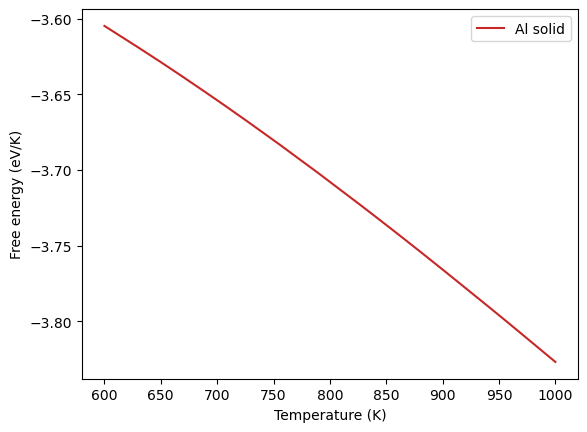

In [12]:
plt.plot(al_sol.output.temperature, al_sol.output.energy_free,
        label="Al solid", color='#C62828')
plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (eV/K)")
plt.legend();

Now we can take a look at how we can add composition changes. For this work we also considered substitutional impurities to change composition. We start again by creating a fcc structure.

In [13]:
structure = pr.create.structure.ase.bulk('Al', cubic=True).repeat(4)

In [14]:
structure.get_chemical_formula()

'Al256'

As we can see, this is pure Al fcc structure. We want to change 5% of atoms to Li.

In [18]:
composition = 0.05
n_Li = int(composition*len(structure))
n_Li

12

Now we randomly replace 12 Al atoms with Li.

In [19]:
structure[np.random.permutation(len(structure))[:n_Li]] = 'Li'

In [20]:
structure.get_chemical_formula()

'Al244Li12'

Now we can continue the calculation as before

In [21]:
al_mix = pr.create.job.Calphy("AlLi_fcc", 
                              delete_aborted_job=True, 
                              delete_existing_job=True)

In [22]:
al_mix.structure = structure
al_mix.potential = 'AlLi-EAM'
al_mix.input.equilibration_control = 'berendsen'
al_mix.server.cores = 4
al_mix.calc_free_energy(temperature=[600, 1000], 
                     pressure=0, 
                     reference_phase="solid",
                     n_equilibration_steps=5000,
                     n_switching_steps=5000)

In [23]:
al_mix.run()

The job AlLi_fcc was saved and received the ID: 8136


/home/menon/miniconda3/envs/potentials_v0.0.2/lib/python3.11/site-packages/ase/io/lammpsdata.py:49: FutureWarning: "style" is deprecated; please use "atom_style".
  warnings.warn(
--------------------------------------------------------------------------
btl_vader_single_copy_mechanism MCA variable, but CMA support is
not available due to restrictive ptrace settings.

The vader shared memory BTL will fall back on another single-copy
mechanism if one is available. This may result in lower performance.

  Local host: cmleo26
--------------------------------------------------------------------------
[cmleo26:04557] 3 more processes have sent help message help-btl-vader.txt / cma-permission-denied
[cmleo26:04557] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages
--------------------------------------------------------------------------
btl_vader_single_copy_mechanism MCA variable, but CMA support is
not available due to restrictive ptrace settings.

The vad

Job 8136 is running!


/home/menon/miniconda3/envs/potentials_v0.0.2/lib/python3.11/site-packages/ase/io/lammpsdata.py:49: FutureWarning: "style" is deprecated; please use "atom_style".
  warnings.warn(


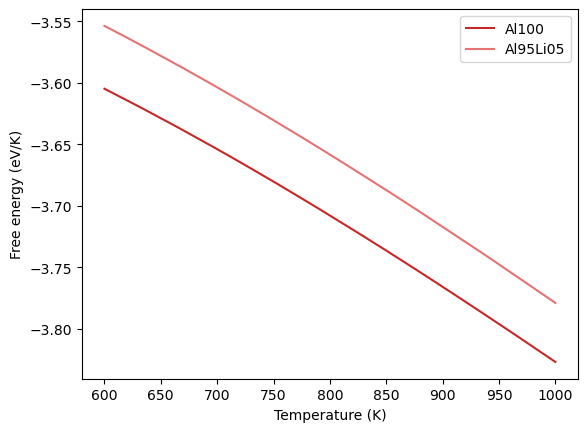

In [24]:
plt.plot(al_sol.output.temperature, al_sol.output.energy_free,
        label="Al100", color='#C62828')
plt.plot(al_mix.output.temperature, al_mix.output.energy_free,
        label="Al95Li05", color='#e57373')

plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (eV/K)")
plt.legend();

Note that these calculations need to be performed for all set of phases. In this case that would be Al fcc, AlLi, liquid and Al3Li at various compositions. The structures for each of these can be extracted from the pyiron Jobs in notebooks for each potential. The further steps are also shown in these notebooks.